In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 



In [3]:
df = pd.read_csv("data.csv")

In [5]:
df.shape

(365, 2)

In [6]:
df.head()

,timestamp,data
0,2023-01-01 05:30:00+05:30,11.764052
1,2023-01-02 05:30:00+05:30,10.900157
2,2023-01-03 05:30:00+05:30,11.978738
3,2023-01-04 05:30:00+05:30,13.740893
4,2023-01-05 05:30:00+05:30,13.867558


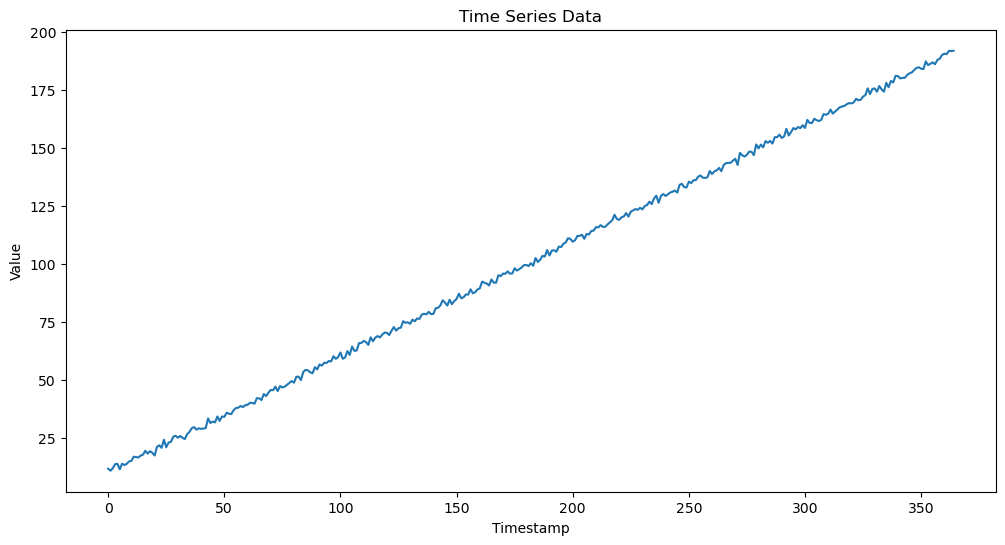

In [8]:
# 1. Visual Inspection:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['data'])
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

# Interpretation : clear upward  trend ,the data may not be stationary.

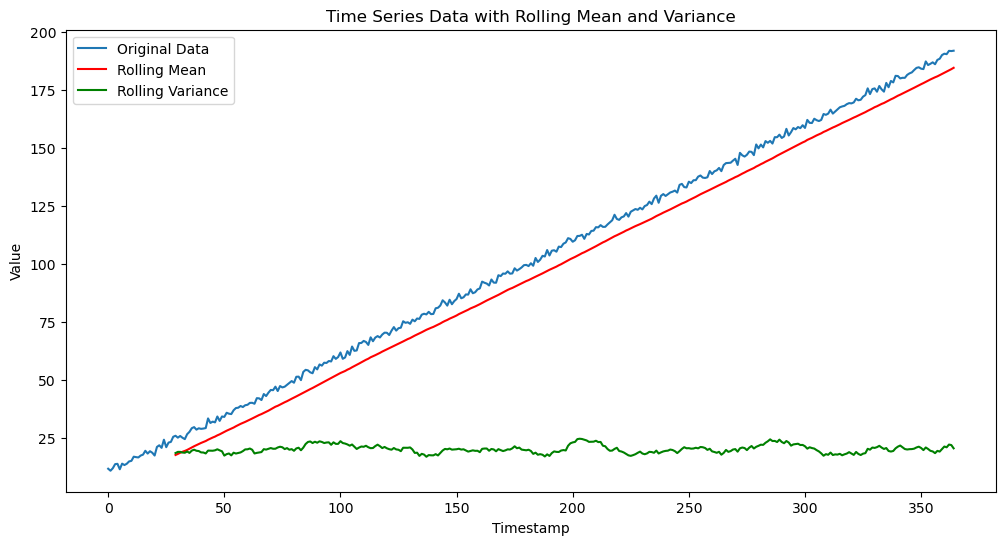

In [10]:
# 2. Summary Statistics:

# You can calculate summary statistics for your data, such as the mean and variance, and observe if they change over time.
# Calculate rolling mean and variance
rolling_mean = df['data'].rolling(window=30).mean()
rolling_var = df['data'].rolling(window=30).var()

# Plot the time series data along with rolling mean and variance
plt.figure(figsize=(12, 6))
plt.plot(df['data'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_var, label='Rolling Variance', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Mean and Variance')
plt.legend()
plt.show()

# Interpretation: If the rolling mean or variance varies significantly over time, it may indicate non-stationarity.

In [14]:
# 3. Dickey-Fuller Test:
# The Dickey-Fuller Test is a statistical test to check for stationarity.
# You can use the statsmodels library to perform this test.
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller Test
result = adfuller(df['data'])

# Extract and print the p-value
p_value = result[1]
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {p_value}')

# Interpretation
if p_value <= 0.05:
    print('The data is stationary (reject the null hypothesis).')
else:
    print('The data is not stationary (fail to reject the null hypothesis)')
    
    
# Interpretation: If the p-value is less than or equal to 0.05, we can conclude that the data is stationary. 
# Otherwise, it's not stationary.

ADF Statistic: 0.5056544595462744
p-value: 0.9850439495332464
The data is not stationary (fail to reject the null hypothesis)


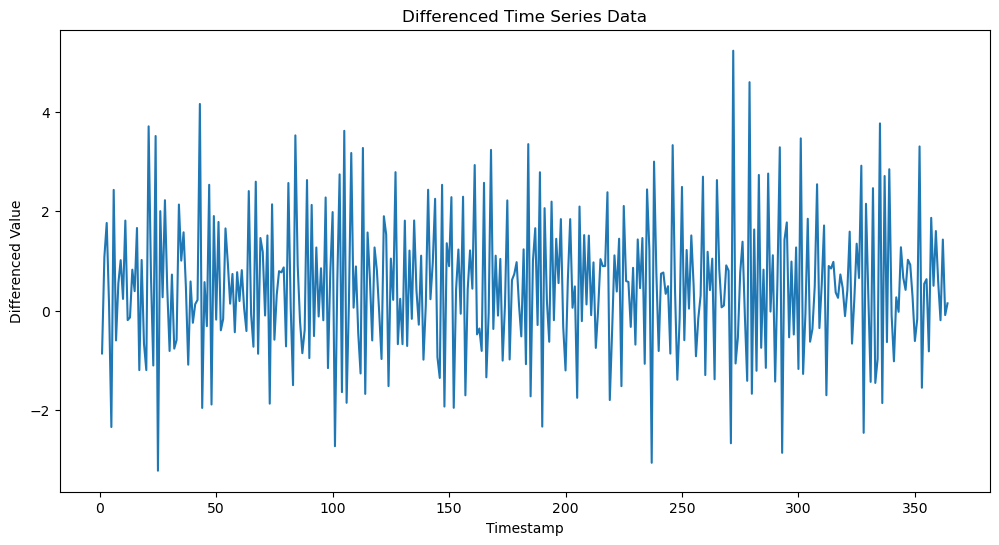

In [17]:
# 4. Data Transformation:
# a) Differencing: You can calculate differences between consecutive data points to remove a trend.

# First-order differencing
ts_diff = df['data'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(ts_diff)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Value')
plt.title('Differenced Time Series Data')
plt.show()


In [ ]:
# Interpretation: If the differenced data appears more constant over time, it may indicate stationarity.

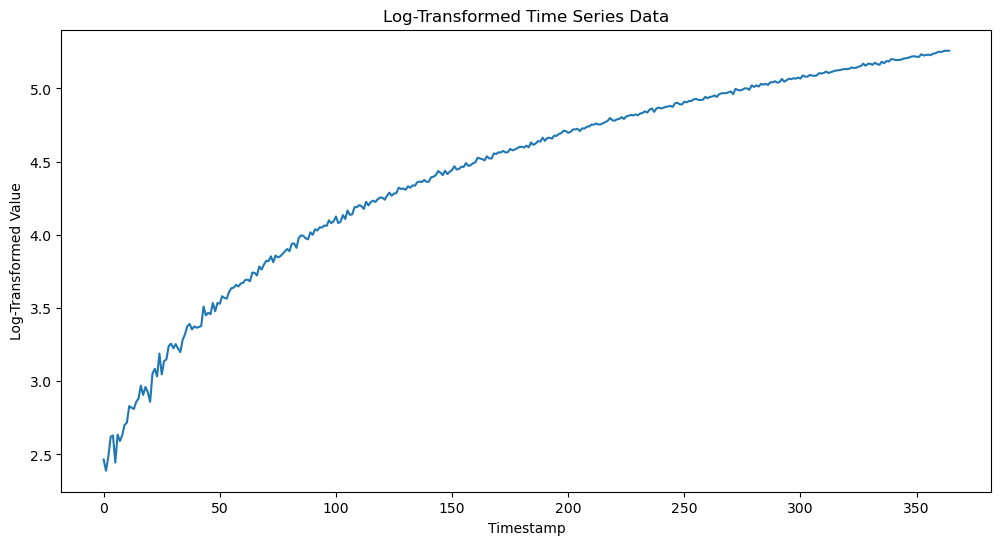

In [18]:
# b) Log Transformation: Applying a logarithmic transformation can stabilize variance.



ts_log = np.log(df['data'])

# Plot the log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(ts_log)
plt.xlabel('Timestamp')
plt.ylabel('Log-Transformed Value')
plt.title('Log-Transformed Time Series Data')
plt.show()


In [ ]:
# Interpretation: A log transformation can help stabilize variance, making the data more stationary.

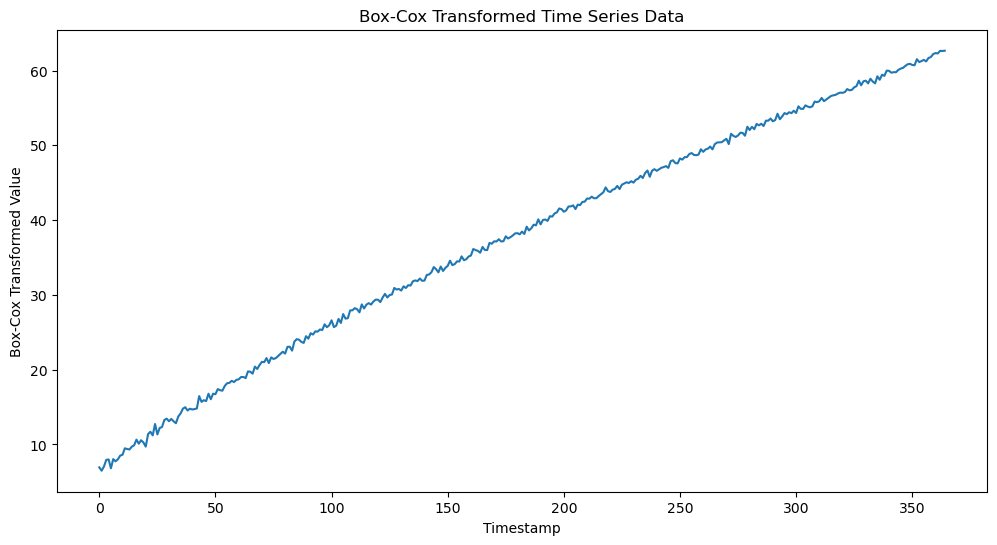

In [20]:
# c) Box-Cox Transformation: The Box-Cox transformation is a family of power transformations that can be 
# useful for stabilizing variance.

from scipy.stats import boxcox

ts_boxcox, _ = boxcox(df['data'])

# Plot the Box-Cox transformed data
plt.figure(figsize=(12, 6))
plt.plot(ts_boxcox)
plt.xlabel('Timestamp')
plt.ylabel('Box-Cox Transformed Value')
plt.title('Box-Cox Transformed Time Series Data')
plt.show()

In [21]:
# Interpretation: The Box-Cox transformation can help stabilize variance, making the data more stationary.

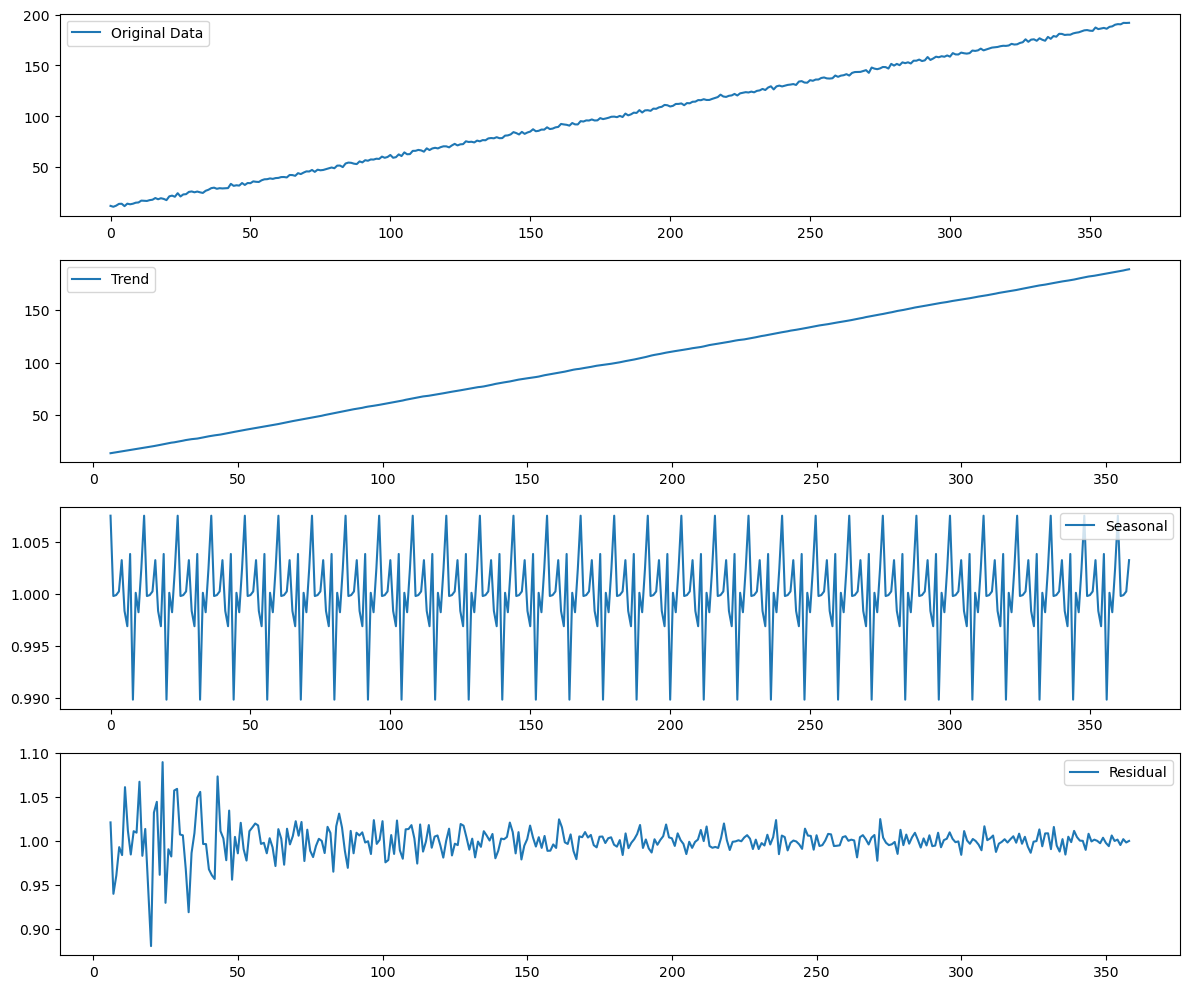

In [25]:
# 5. Decomposition:
# Decomposing a time series into its components (trend, seasonality, and residual) can help in identifying stationarity.

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df['data'],period=12, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df['data'], label='Original Data')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation: If the residual component appears relatively constant over time, it may indicate stationarity.


/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


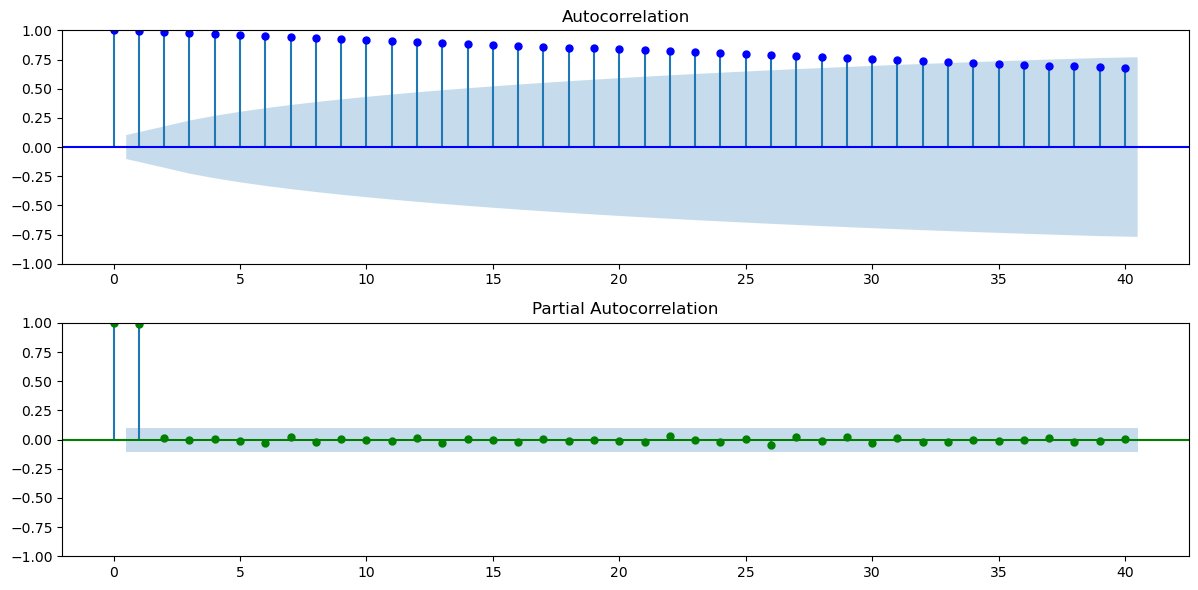

In [26]:
# 6. ACF and PACF:

# ACF (AutoCorrelation Function) helps you check the relationship between the lag value and the current value.
# PACF (Partial AutoCorrelation Function) helps you check the relationship between the timestamp 
# and intermediate lag values (e.g., t and t-2).
# To plot ACF and PACF and determine significant values:


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['data'], lags=40, ax=plt.gca(), color='blue')
plt.subplot(2, 1, 2)
plot_pacf(df['data'], lags=40, ax=plt.gca(), color='green')
plt.tight_layout()
plt.show()


In [ ]:
# Interpretation: Look for significant spikes (above the dashed line) in the ACF and PACF plots. 
# These spikes indicate the potential values for p and q in an ARIMA model.